# Importing Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
pd.set_option('future.no_silent_downcasting', True)

# Loading Dataset

In [4]:
car_dataset = pd.read_csv('car data.csv')
car_dataset

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


# Checking the number of rows and columns

In [6]:
car_dataset.shape

(301, 9)

# Checking column Names and it's datatype

In [8]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


# Checking the number of missing values

In [10]:
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

# Checking the distribution of categorical data

In [12]:
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())
print(car_dataset.Owner.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64
Owner
0    290
1     10
3      1
Name: count, dtype: int64


# Encoding the Categorical Data

In [14]:
# Encoding "Fuel_Type" Column
car_dataset['Fuel_Type'] = car_dataset['Fuel_Type'].replace({'Petrol': 0, 'Diesel': 1, 'CNG': 2})

# Encoding "Seller_Type" Column
car_dataset['Seller_Type'] = car_dataset['Seller_Type'].replace({'Dealer': 0, 'Individual': 1})

# Encoding "Transmission" Column
car_dataset['Transmission'] = car_dataset['Transmission'].replace({'Manual': 0, 'Automatic': 1})

car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


# Extracting Dependent and Independent Variables

In [16]:
X = car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
Y = car_dataset['Selling_Price']

# Splitting Training and Test data

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=2)
print(X_train.shape)
print(X_test.shape)

(240, 7)
(61, 7)


# Standardization

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# Creation of Model

In [23]:
# loading the linear regression model
lin_reg_model = LinearRegression()

# Train the Model

In [25]:
lin_reg_model.fit(X_train,Y_train) #Training

LinearRegression()

# Prediction on Training data

In [27]:
training_data_prediction = lin_reg_model.predict(X_train)
training_data_prediction

array([ 6.78487861e+00,  1.03052148e+00,  4.33053370e+00,  2.19376150e-02,
        3.57946207e+00,  2.79503372e+00,  1.43719894e+00,  4.14889545e-01,
        1.61166418e+00,  1.12839641e+00,  4.32086309e+00,  6.17477452e+00,
        9.29097627e-01,  7.35592155e-01,  6.15378778e+00,  3.42694561e+00,
        2.32984882e+00,  7.50014006e+00,  4.61811711e+00,  4.43437311e+00,
        4.45915634e+00,  2.73352428e+00,  4.44377264e+00,  1.71378422e+00,
        2.49318608e-01,  3.94331375e+00,  1.37445456e+00,  4.61754769e+00,
        1.38595068e+00,  7.35605367e+00,  7.24473016e+00,  6.54331682e+00,
        2.29055849e+00,  2.19058216e+01,  2.19873970e+00,  5.64492151e+00,
        2.82714047e+00,  7.68311323e+00,  5.67039850e+00,  1.00273475e+01,
        1.99828812e+00,  2.37716894e+00,  1.22731322e+00,  2.40303328e+00,
        9.94390646e+00,  2.01662591e+00, -6.42391420e-01,  5.42943934e+00,
        1.14107420e+01, -5.10458803e-03,  1.09479248e+00,  1.61329534e+00,
        5.38687939e+00,  

# R squared Error for Training Data

In [29]:
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8838169193709795


# Visualize the actual prices and Predicted prices

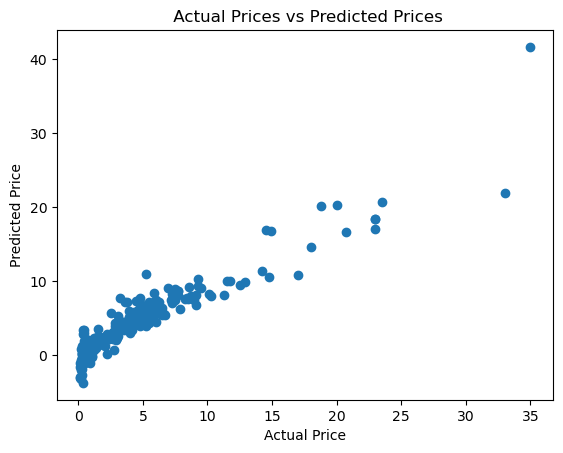

In [31]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

# Prediction on Testing data

In [33]:
test_data_prediction = lin_reg_model.predict(X_test)

# R squared Error for Testing Data

In [35]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8401532365378387


# Visualize the actual prices and Predicted prices

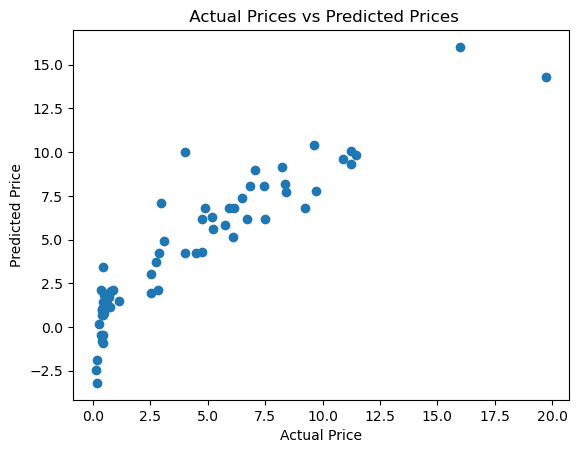

In [36]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()